In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

url = "/content/drive/MyDrive/PRODIGY INFO TECH/bank-full.csv"
data = pd.read_csv(url, sep=';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X = pd.get_dummies(X, drop_first=True)
y = y.map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.898849896785609

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.65      0.29      0.40      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564




Decision Tree Rules:
 |--- duration <= 518.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 225.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- month_mar >  0.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  225.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- housing_yes >  0.50
|   |   |   |   |--- class: 0
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 162.50
|   |   |   |--- duration <= 132.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  132.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  162.50
|   |   |   |--- month_may <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- month_may >  0.50
|   |   |   |   |--- class: 1
|--- duration >  518.50
|   |--- duration <= 827.50
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- contact_unknown <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- contact_unknown >  0.50
|   |   |   |   |--- class: 0

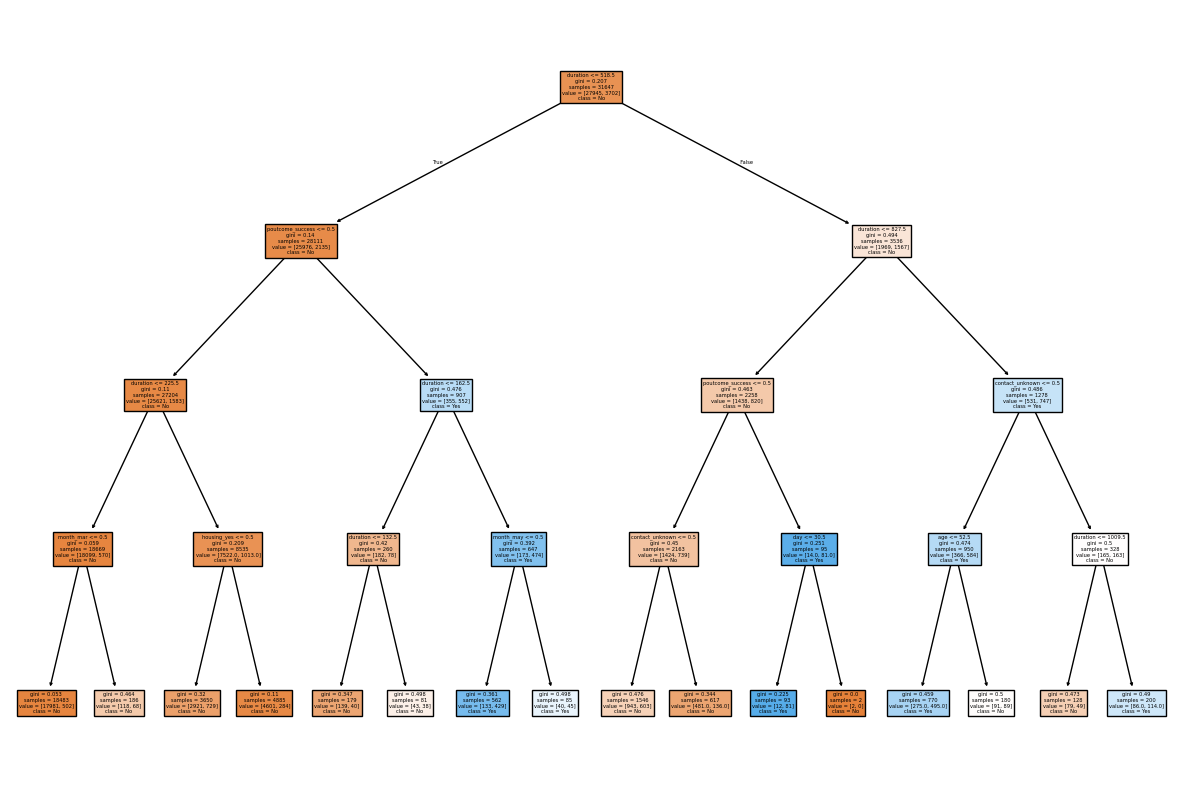

In [10]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

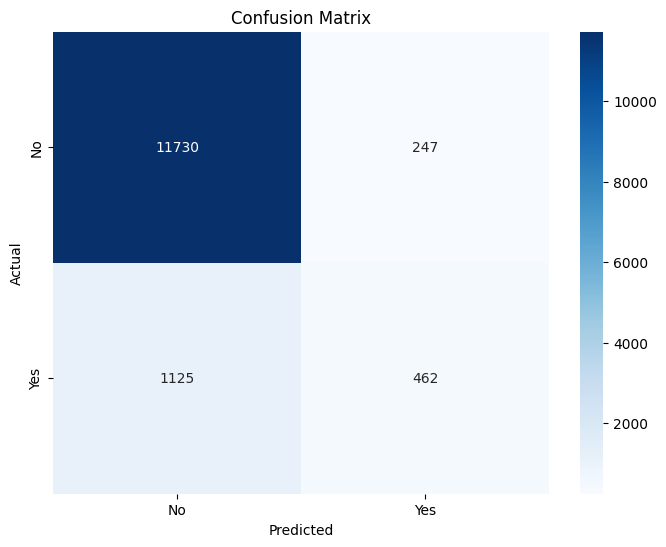

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
